In [154]:
#coding=utf-8
import os          # Provides functions for interacting with the operating system, such as file manipulation.
#import shutil      # Offers high-level file operations, like copying and moving files.
#import kaggle      # Allows interaction with Kaggle's API for dataset downloads and competition submissions.
#import zipfile

In [155]:
#current_user_profile = os.path.expanduser("~")  # Gets the path to the current user's home directory.
#kaggle_directory = os.path.join(current_user_profile, ".kaggle")  # Constructs the path to the .kaggle directory in the user's home directory.
#extract_dir = os.getcwd()  # Gets the current working directory where files will be extracted.

In [156]:
#os.makedirs(kaggle_directory, exist_ok=True)  # Creates the .kaggle directory if it does not already exist; does nothing if the directory already exists.

In [157]:
#kaggle_json_content = {
  #  "username": "shaimaahmed",  # Kaggle username for authentication.
  #  "key": "edc7d1ccf0b304c241bb42b1e66e6ae6"  # Kaggle API key for authentication.
#}

In [158]:
#kaggle_json_path = os.path.join(kaggle_directory, "kaggle.json")  # Constructs the path for the kaggle.json file within the .kaggle directory.

In [159]:
#with open(kaggle_json_path, "w") as json_file:  # Opens (or creates) the kaggle.json file for writing.
   # import json  # Imports the JSON module to handle JSON data.
  #  json.dump(kaggle_json_content, json_file)  # Writes the Kaggle credentials to the kaggle.json file in JSON format.

In [160]:
#api = kaggle.KaggleApi()  # Initializes the Kaggle API client.
#api.authenticate()  # Authenticates the client using credentials from kaggle.json.

In [161]:
#dataset_path = os.path.join(extract_dir, 'toxic-comment-classification')

In [162]:
#os.makedirs(dataset_path, exist_ok=True)  # Creates the dataset directory if it does not already exist; does nothing if it already exists.

In [163]:
#api.dataset_download_files('toxic-comment-classification', path=dataset_path, unzip=False)  # Downloads the dataset from Kaggle to the specified path without unzipping it.

In [164]:
#downloaded_file_path = os.path.join(dataset_path, 'toxic-comment-classification.zip')  # Constructs the path for the downloaded ZIP file.

In [165]:
#if os.path.exists(downloaded_file_path):  # Checks if the downloaded ZIP file exists.
   # with zipfile.ZipFile(downloaded_file_path, 'r') as zip_ref:  # Opens the ZIP file for reading.
       # zip_ref.extractall(dataset_path)  # Extracts all contents of the ZIP file to the dataset directory.
   # print("Dataset unzipped successfully.")  # Prints a success message if extraction is successful.
#else:
  #  print("Failed to download the dataset. Please check the Kaggle API setup and try again.")  # Prints an error message if the ZIP file does not exist.

In [166]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
from keras import models
from keras.layers import Dense
from keras.regularizers import l1, l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import os
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
import string

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

import shutil
import glob
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import codecs
import re

[nltk_data] Downloading package punkt to /Users/evi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [167]:
#df=pd.read_csv('/Users/evi/Desktop/SMS_train.csv')

In [168]:

import nltk
import ssl

# Set the SSL certificates
ssl._create_default_https_context = ssl._create_default_https_context # for Python 3.6 and above
nltk.data.path.append("/path/to/your/nltk_data")

# Now try loading the punkt data
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/evi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [169]:
os.getcwd()

'/Users/evi/Desktop/my_advproj'

In [170]:
#coding=utf-8

df_train = pd.read_csv('SMS_train.csv',encoding='Latin-1')
df_test = pd.read_csv('SMS_test.csv',encoding='Latin-1')

In [171]:
df_train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [172]:
# checking for missing values 
df_train.isnull().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [173]:
df_test.isnull().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [174]:


#Converting Categorical Variable to Numeric

df_train['Label'].replace(['Spam', 'Non-Spam'],[0, 1], inplace=True)

df_test['Label'].replace(['Spam', 'Non-Spam'],[0, 1], inplace=True)


/var/folders/bd/ltrfk09d25dgyjffp5b79m8r0000gn/T/ipykernel_45150/2046042961.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Label'].replace(['Spam', 'Non-Spam'],[0, 1], inplace=True)
/var/folders/bd/ltrfk09d25dgyjffp5b79m8r0000gn/T/ipykernel_45150/2046042961.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

In [175]:
df_train

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,1
1,2,The guy did some bitching but I acted like i'd...,1
2,3,"Pity, * was in mood for that. So...any other s...",1
3,4,Will ü b going to esplanade fr home?,1
4,5,This is the 2nd time we have tried 2 contact u...,0
...,...,...,...
952,953,hows my favourite person today? r u workin har...,1
953,954,How much you got for cleaning,1
954,955,Sorry da. I gone mad so many pending works wha...,1
955,956,Wat time ü finish?,1


In [176]:
df_test

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",0
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",0
2,3,Congrats! Nokia 3650 video camera phone is you...,0
3,4,URGENT! Your Mobile number has been awarded wi...,0
4,5,Someone has contacted our dating service and e...,0
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,1
121,122,Try to do something dear. You read something f...,1
122,123,Sun ah... Thk mayb can if dun have anythin on....,1
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",1


In [177]:
import nltk 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/evi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [178]:
#task1 
# text preprocessing 
train_set=df_train['Message_body']
test_set=df_test['Message_body']
    

def process_text(text):
    
    # Remove digits and punctuation
    text = text.translate(str.maketrans('', '', string.digits + string.punctuation))

    # Lowercase the text
    text = text.lower()

    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Join the filtered tokens back into a string
    filtered_text = " ".join(filtered_tokens)

    return filtered_text

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

for txt in train_set:
    processed_text = process_text(txt)
        #stemming
    #stemmer = PorterStemmer()
    #print(stemmer.stem(processed_text))
        #lemmatization
    #lemmatizer = WordNetLemmatizer()
    #print(lemmatizer.lemmatize(processed_text))
df_train['processed']=df_train['Message_body'].apply(lambda x: process_text(x))
df_train.head()

,S. No.,Message_body,Label,processed
0,1,Rofl. Its true to its name,1,rofl true name
1,2,The guy did some bitching but I acted like i'd...,1,guy bitching acted like id interested buying s...
2,3,"Pity, * was in mood for that. So...any other s...",1,pity mood soany suggestions
3,4,Will ü b going to esplanade fr home?,1,ü b going esplanade fr home
4,5,This is the 2nd time we have tried 2 contact u...,0,nd time tried contact u u £ pound prize claim ...


In [179]:
# Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
#for stemmed_text in train_set:
    #stemmer.stem(stemmed_text)
df_train['stemmed']=df_train['Message_body'].apply(lambda x: stemmer.stem(x))
df_train.head()

,S. No.,Message_body,Label,processed,stemmed
0,1,Rofl. Its true to its name,1,rofl true name,rofl. its true to its nam
1,2,The guy did some bitching but I acted like i'd...,1,guy bitching acted like id interested buying s...,the guy did some bitching but i acted like i'd...
2,3,"Pity, * was in mood for that. So...any other s...",1,pity mood soany suggestions,"pity, * was in mood for that. so...any other s..."
3,4,Will ü b going to esplanade fr home?,1,ü b going esplanade fr home,will ü b going to esplanade fr home?
4,5,This is the 2nd time we have tried 2 contact u...,0,nd time tried contact u u £ pound prize claim ...,this is the 2nd time we have tried 2 contact u...


In [180]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/evi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [181]:

        #lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#for lemmatized_text in train_set:
    #print(lemmatizer.lemmatize(lemmatized_text))
df_train['lemmatized']=df_train['Message_body'].apply(lambda x: lemmatizer.lemmatize(x))
df_train.head()

,S. No.,Message_body,Label,processed,stemmed,lemmatized
0,1,Rofl. Its true to its name,1,rofl true name,rofl. its true to its nam,Rofl. Its true to its name
1,2,The guy did some bitching but I acted like i'd...,1,guy bitching acted like id interested buying s...,the guy did some bitching but i acted like i'd...,The guy did some bitching but I acted like i'd...
2,3,"Pity, * was in mood for that. So...any other s...",1,pity mood soany suggestions,"pity, * was in mood for that. so...any other s...","Pity, * was in mood for that. So...any other s..."
3,4,Will ü b going to esplanade fr home?,1,ü b going esplanade fr home,will ü b going to esplanade fr home?,Will ü b going to esplanade fr home?
4,5,This is the 2nd time we have tried 2 contact u...,0,nd time tried contact u u £ pound prize claim ...,this is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...


In [182]:
#label preprocessing
#label to logical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(df_train['Label'])
test_labels_encoded = label_encoder.fit_transform(df_test['Label'])

In [183]:

train_labels_encoded[:5]

array([1, 1, 1, 1, 0])

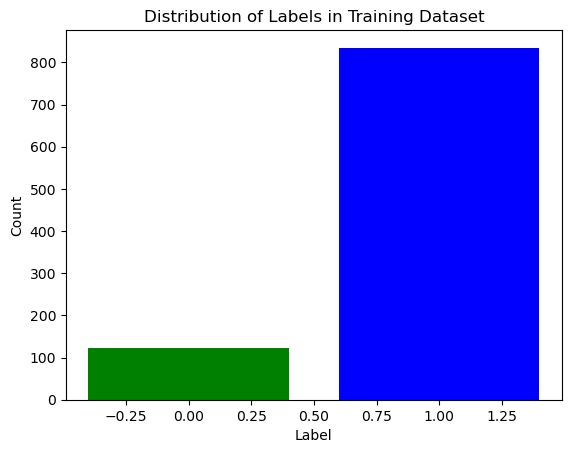

In [184]:
#task2 
# Visualize
label_counts = df_train['Label'].value_counts()
labels = label_counts.index
counts = label_counts.values

# Create a bar chart
plt.bar(labels, counts, color=['blue', 'green'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Training Dataset')
plt.show()

In [185]:
print(test_predictions)

[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [191]:

#  SVM -- TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['Message_body'], df_train['Label'], test_size=0.2, random_state=42)

# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train SVM model
svm_model_tfidf = SVC(kernel='linear')
svm_model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_tfidf = svm_model_tfidf.predict(X_test_tfidf)

# Evaluate the model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
classification_report_tfidf = classification_report(y_test, y_pred_tfidf)

# Print the results
print("TF-IDF SVM Model Results:")
print(f"Test Accuracy: {accuracy_tfidf:.2%}")
print("\nClassification Report:")
print(classification_report_tfidf)

TF-IDF SVM Model Results:
Test Accuracy: 96.35%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        27
           1       0.96      1.00      0.98       165

    accuracy                           0.96       192
   macro avg       0.98      0.87      0.92       192
weighted avg       0.97      0.96      0.96       192



In [187]:
!pip3 install joblib

In [188]:
import joblib

joblib.dump(svm_model_tfidf, 'SVM_model.pkl')


['SVM_model.pkl']

In [195]:

# Save the vectorizer
joblib.dump(tfidf_vectorizer, 'app/vectorizer.pkl')

['app/vectorizer.pkl']